

<h1 align="center"><font size="5">Predicting Total payment of Auto Insurances based on number of claims </font></h1>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
import operator
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
%matplotlib inline

This dataset has two columns.....  X = Number of claims....  Y = total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden

In [2]:
df = pd.read_csv(r'E:\Datasets\auto_insurance_sweden.csv', encoding = 'unicode_escape')   
df.head(100)

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [3]:
df.isnull()

,X,Y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
58,False,False
59,False,False
60,False,False
61,False,False


In [4]:
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [5]:
X = np.array(df['X']).reshape(-1,1)
y = np.array(df['Y']).reshape(-1,1)

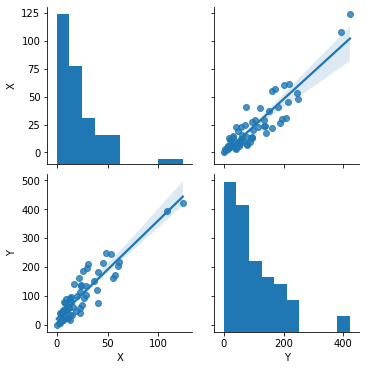

In [6]:
sns.pairplot(df, kind="reg")

In [6]:
df.isnull().sum()

X    0
Y    0
dtype: int64

# Linear Models

### 1.Linear Regression

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lin_df = LinearRegression()  
lin_df.fit(X_train, y_train)
lr_pred = lin_df.predict(X_test)   
lr_pred[0:5]

array([[206.94573169],
       [ 99.43414033],
       [410.84702566],
       [147.62899163],
       [221.77491671]])

In [8]:
linrgr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
linrgr_r2 = r2_score(y_test, lr_pred)
print("RMSE Score for Test set: ",linrgr_rmse)
print("R2 Score: ",linrgr_r2)

RMSE Score for Test set:  36.12176263358525
R2 Score:  0.8880527542012344


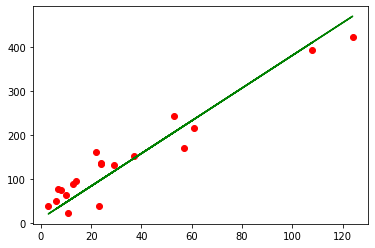

In [15]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, lr_pred, color='g')
plt.show()

### Ridge Regression

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn import linear_model
reg = linear_model.Ridge()
reg.fit(X_train, y_train)
rdg_pred = reg.predict(X_test)
print("The coefficients after ridge regression is :", reg.coef_)
print("The intercept after ridge regression is :", reg.intercept_)
rdg_pred[0:5]

The coefficients after ridge regression is : [[3.70692735]]
The intercept after ridge regression is : [10.46581308]


array([[206.93296251],
       [ 99.43206943],
       [410.81396664],
       [147.62212495],
       [221.76067191]])

In [11]:
rdgrgr_rmse = np.sqrt(mean_squared_error(y_test, rdg_pred))
rdgrgr_r2 = r2_score(y_test, rdg_pred)
print("RMSE Score for Test set: ",rdgrgr_rmse)
print("R2 Score: ",rdgrgr_r2)

RMSE Score for Test set:  36.11686194778923
R2 Score:  0.8880831281930621


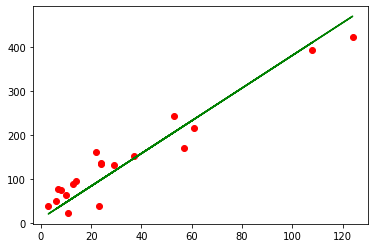

In [15]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, rdg_pred, color='g')
plt.show()

### Lasso

In [16]:
# Finding the best value of alpha using cross validation
from sklearn.linear_model import LassoCV
regr = LassoCV()
regr.fit(X, y)
print(regr.alpha_)

34.32935353504641


In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn import linear_model
clf = linear_model.Lasso(alpha=regr.alpha_)
clf.fit(X_train, y_train)
las_pred = clf.predict(X_test)
print("The coefficients after lasso regression is :", clf.coef_)
print("The intercept after lasso regression is :", clf.intercept_)
las_pred[0:5]

The coefficients after lasso regression is : [3.55697513]
The intercept after lasso regression is : [13.22288907]


array([201.742571  ,  98.59029221, 397.3762032 , 144.83096891,
       215.97047153])

In [18]:
lasrgr_rmse = np.sqrt(mean_squared_error(y_test, las_pred))
lasrgr_r2 = r2_score(y_test, las_pred)
print("RMSE Score for Test set: ",lasrgr_rmse)
print("R2 Score: ",lasrgr_r2)

RMSE Score for Test set:  34.499884496429644
R2 Score:  0.8978799951970453


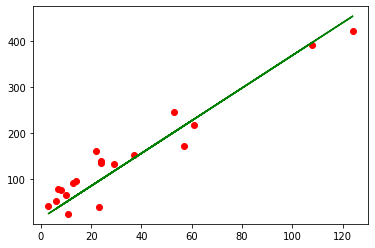

In [19]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, las_pred, color='g')
plt.show()

### ElasticNet

In [20]:
# Finding the best value of alpha using cross validation
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV()
regr.fit(X, y)
print(regr.alpha_)

15.861051837193102


In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
# Actual regression on test set
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=regr.alpha_)
reg.fit(X_train, y_train)
en_pred = reg.predict(X_test)
print("The coefficients after elasticnet regression is :", reg.coef_)
print("The intercept after elasticnet regression is :", reg.intercept_)
en_pred[0:5]

The coefficients after elasticnet regression is : [3.54931612]
The intercept after elasticnet regression is : [13.36371052]


array([201.47746462,  98.54729728, 396.68985096, 144.68840678,
       215.67472908])

In [23]:
enrgr_rmse = np.sqrt(mean_squared_error(y_test, en_pred))
enrgr_r2 = r2_score(y_test, en_pred)
print("RMSE Score for Test set: ",enrgr_rmse)
print("R2 Score: ",enrgr_r2)

RMSE Score for Test set:  34.438367982723726
R2 Score:  0.8982438495119887


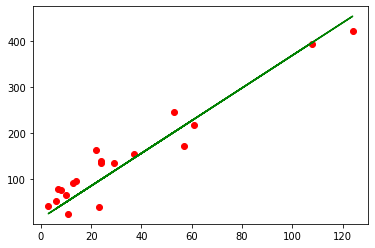

In [24]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, en_pred, color='g')
plt.show()

### LassoLars

In [25]:
# Finding the best value of alpha using cross validation
from sklearn.linear_model import LassoLarsCV
regr = LassoLarsCV()
regr.fit(X, y)
print(regr.alpha_)

0.0


In [26]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=regr.alpha_)
reg.fit(X_train, y_train)
lslr_pred = reg.predict(X_test)
print("The coefficients after elasticnet regression is :", reg.coef_)
print("The intercept after elasticnet regression is :", reg.intercept_)
lslr_pred[0:5]

The coefficients after elasticnet regression is : [3.70729625]
The intercept after elasticnet regression is : [10.45903024]


array([206.94573169,  99.43414033, 410.84702566, 147.62899163,
       221.77491671])

In [27]:
lslrrgr_rmse = np.sqrt(mean_squared_error(y_test, lslr_pred))
lslrrgr_r2 = r2_score(y_test, lslr_pred)
print("RMSE Score for Test set: ",lslrrgr_rmse)
print("R2 Score: ",lslrrgr_r2)

RMSE Score for Test set:  36.12176263358526
R2 Score:  0.8880527542012344


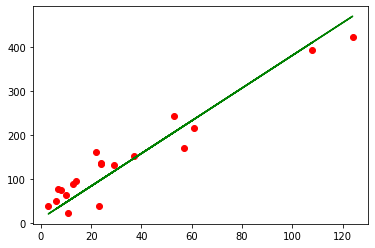

In [28]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, lslr_pred, color='g')
plt.show()

# 3.Polynomial Regression

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures

from sklearn import linear_model

plrgr_rmse = np.zeros(9)
plrgr_r2 = np.zeros(9)

for i in range(1,10):
    poly_df = PolynomialFeatures(degree = i)
    transform_poly = poly_df.fit_transform(X_train)
    clf = linear_model.LinearRegression()
    clf.fit(transform_poly,y_train)
    polynomial_predict = clf.predict(poly_df.fit_transform(X_test))
    plrgr_rmse[i-1] = np.sqrt(mean_squared_error(y_test,polynomial_predict))
    plrgr_r2[i-1] = r2_score(y_test,polynomial_predict)
    print("\nThe predicted values with degree = ",i," is \n",polynomial_predict[0:5])
    print("\nRMSE Score of Test set for degree ", i," is: ",plrgr_rmse[i-1])
    print("R2 RMSE Score of Test set for degree ", i," is: ",plrgr_r2[i-1]) 

print("\nThe best RMSE score of Test Set is ", plrgr_rmse.min(), " with degree = ",plrgr_rmse.argmin()+1)
print("The max R2 score of Test Set is ", plrgr_r2.max(), " with degree = ",plrgr_r2.argmax()+1)


The predicted values with degree =  1  is 
 [[206.94573169]
 [ 99.43414033]
 [410.84702566]
 [147.62899163]
 [221.77491671]]

RMSE Score of Test set for degree  1  is:  36.121762633585305
R2 RMSE Score of Test set for degree  1  is:  0.8880527542012341

The predicted values with degree =  2  is 
 [[192.6021439 ]
 [109.43256857]
 [189.54980323]
 [153.9544103 ]
 [199.47987398]]

RMSE Score of Test set for degree  2  is:  84.66043991465709
R2 RMSE Score of Test set for degree  2  is:  0.38505455911495134

The predicted values with degree =  3  is 
 [[ 192.82346814]
 [ 108.8017519 ]
 [-140.8618238 ]
 [ 158.04629709]
 [ 195.1659836 ]]

RMSE Score of Test set for degree  3  is:  235.10697611788615
R2 RMSE Score of Test set for degree  3  is:  -3.742491660635668

The predicted values with degree =  4  is 
 [[ 192.87404729]
 [ 108.77151004]
 [-156.05213011]
 [ 158.03985915]
 [ 195.17034321]]

RMSE Score of Test set for degree  4  is:  243.35995762098537
R2 RMSE Score of Test set for degree  4

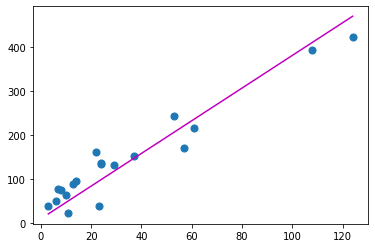

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
#Draw the plot using the best degree
poly_df = PolynomialFeatures(degree = plrgr_r2.argmax()+1)
transform_poly = poly_df.fit_transform(X_train)
clf = linear_model.LinearRegression()
clf.fit(transform_poly,y_train)
polynomial_predict = clf.predict(poly_df.fit_transform(X_test))


plt.scatter(X_test, y_test, s=50)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,polynomial_predict), key=sort_axis)
X_test, polynomial_predict = zip(*sorted_zip)
plt.plot(X_test, polynomial_predict, color='m')
plt.show()

# 4.Decision Tree Regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

k = ['mse', 'friedman_mse', 'mae']
dt_rmse = np.zeros(3)
dt_r2 = np.zeros(3)
n = 0

from sklearn.tree import DecisionTreeRegressor
for i in k:
    dt_reg = DecisionTreeRegressor(criterion = i)          # create  DecisionTreeReg with sklearn
    dt_reg.fit(X_train,y_train)
    dt_predict = dt_reg.predict(X_test)
    dt_rmse[n] = np.sqrt(mean_squared_error(y_test,dt_predict))
    dt_r2[n] = r2_score(y_test,dt_predict)
    print("\nThe predicted values for Test Set using criterion = ",i," is: ",dt_predict[0:5])
    print("\nThe RMSE score for Test Set using criterion = ",i," is: ",dt_rmse[n])
    print("The R2 score for Test Set using criterion = ",i," is: ",dt_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", dt_rmse.min())
print("The max R2 score of Test Set is ", dt_r2.max())   


The predicted values for Test Set using criterion =  mse  is:  [162.8   84.95 202.4  119.4  162.8 ]

The RMSE score for Test Set using criterion =  mse  is:  77.21951981051217
The R2 score for Test Set using criterion =  mse  is:  0.48840094021243674

The predicted values for Test Set using criterion =  friedman_mse  is:  [162.8   84.95 202.4  119.4  162.8 ]

The RMSE score for Test Set using criterion =  friedman_mse  is:  77.21951981051217
The R2 score for Test Set using criterion =  friedman_mse  is:  0.48840094021243674

The predicted values for Test Set using criterion =  mae  is:  [162.8   84.95 202.4  119.4  162.8 ]

The RMSE score for Test Set using criterion =  mae  is:  77.98242463934793
The R2 score for Test Set using criterion =  mae  is:  0.4782421248698103

The best RMSE score for Test Set is  77.21951981051217
The max R2 score of Test Set is  0.48840094021243674


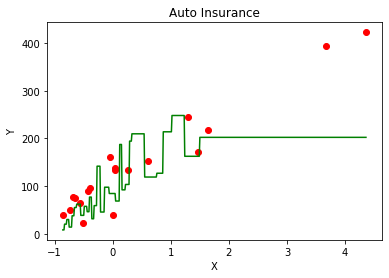

In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

dt_reg = DecisionTreeRegressor(criterion = 'mse')          # create  DecisionTreeReg with sklearn
dt_reg.fit(X_train,y_train)

plt.scatter(X_test,y_test, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt_reg.predict(X_grid),color="g")                 # line draw
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Auto Insurance")
plt.show()

# Ensemble Methods

### Random Forest Model

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

k = ['mse', 'mae']
n = 0
rf_rmse = np.zeros(2)
rf_r2 = np.zeros(2)

from sklearn.ensemble import RandomForestRegressor
for i in k:
    rf_reg = RandomForestRegressor(criterion = i)
    rf_reg.fit(X_train,y_train)
    rf_pred = rf_reg.predict(X_test)
    rf_rmse[n] = np.sqrt(mean_squared_error(y_test,rf_pred))
    rf_r2[n] = r2_score(y_test,dt_predict)
    print("\nThe predicted values for Test Set using criterion = ",i," is: ",rf_pred[0:5])
    print("\nThe RMSE score for Test Set using criterion = ",i," is: ",rf_rmse[n])
    print("The R2 score for Test Set using criterion = ",i," is: ",rf_r2[n])
    n += 1   
    
print("\nThe best RMSE score for Test Set is ", rf_rmse.min())
print("The max R2 score of Test Set is ", rf_r2.max())       


The predicted values for Test Set using criterion =  mse  is:  [185.617    85.42445 194.328   123.5404  179.676  ]

The RMSE score for Test Set using criterion =  mse  is:  78.19096053577888
The R2 score for Test Set using criterion =  mse  is:  0.4782421248698103

The predicted values for Test Set using criterion =  mae  is:  [178.8075  84.7215 193.5195 122.13   173.3235]

The RMSE score for Test Set using criterion =  mae  is:  79.35801646262075
The R2 score for Test Set using criterion =  mae  is:  0.4782421248698103

The best RMSE score for Test Set is  78.19096053577888
The max R2 score of Test Set is  0.4782421248698103


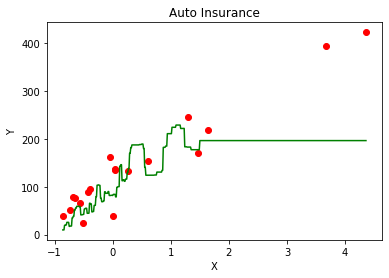

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

rf_reg = RandomForestRegressor(criterion = 'mae')          # create  DecisionTreeReg with sklearn
rf_reg.fit(X_train,y_train)

plt.scatter(X_test,y_test, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,rf_reg.predict(X_grid),color="g")                 # line draw
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Auto Insurance")
plt.show()

### ADABoost

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

k = ['linear', 'square', 'exponential']
n = 0
adb_rmse = np.zeros(3)
adb_r2 = np.zeros(3)

from sklearn.ensemble import AdaBoostRegressor
for i in k:
    ada_regr = AdaBoostRegressor(loss = i)
    ada_regr.fit(X_train,y_train)
    ada_pred = ada_regr.predict(X_test)
    adb_rmse[n] = np.sqrt(mean_squared_error(y_test,ada_pred))
    adb_r2[n] = r2_score(y_test,ada_pred)
    print("\nThe predicted values for Test Set using loss = ",i," is: ",ada_pred[0:5])
    print("\nThe RMSE score for Test Set using loss = ",i," is: ",adb_rmse[n])
    print("The R2 score for Test Set using loss = ",i," is: ",adb_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", adb_rmse.min())
print("The max R2 score of Test Set is ", adb_r2.max())           


The predicted values for Test Set using loss =  linear  is:  [182.6     89.0875 182.6    124.7    182.6   ]

The RMSE score for Test Set using loss =  linear  is:  81.62922245823029
The R2 score for Test Set using loss =  linear  is:  0.42830174861332404

The predicted values for Test Set using loss =  square  is:  [162.8         75.34       162.8        124.71290323 162.8       ]

The RMSE score for Test Set using loss =  square  is:  90.70565072044243
The R2 score for Test Set using loss =  square  is:  0.29409829482852523

The predicted values for Test Set using loss =  exponential  is:  [176.    84.95 182.6  125.76 176.  ]

The RMSE score for Test Set using loss =  exponential  is:  81.79306923641947
The R2 score for Test Set using loss =  exponential  is:  0.4260044114039231

The best RMSE score for Test Set is  81.62922245823029
The max R2 score of Test Set is  0.42830174861332404


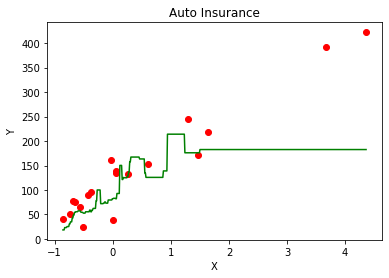

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

ada_regr = AdaBoostRegressor(loss = 'exponential')          # create  DecisionTreeReg with sklearn
ada_regr.fit(X_train,y_train)

plt.scatter(X_test,y_test, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,ada_regr.predict(X_grid),color="g")                 # line draw
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Auto Insurance")
plt.show()

### Gradient Boosting

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

k = ['ls', 'lad', 'huber', 'quantile']
n = 0
gdb_rmse = np.zeros(4)
gdb_r2 = np.zeros(4)

from sklearn.ensemble import GradientBoostingRegressor

for i in k:
    reg = GradientBoostingRegressor(loss = i)
    reg.fit(X_train, y_train)
    grdbst_pred = reg.predict(X_test)
    gdb_rmse[n] = np.sqrt(mean_squared_error(y_test,grdbst_pred))
    gdb_r2[n] = r2_score(y_test,grdbst_pred)
    print("\nThe predicted values for Test Set using loss = ",i," is: ",grdbst_pred[0:5])
    print("\nThe RMSE score for Test Set using loss = ",i," is: ",gdb_rmse[n])
    print("The R2 score for Test Set using loss = ",i," is: ",gdb_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", gdb_rmse.min())
print("The max R2 score of Test Set is ", gdb_r2.max())           


The predicted values for Test Set using loss =  ls  is:  [165.64433916  84.50203994 200.91134719 122.35049206 165.64433916]

The RMSE score for Test Set using loss =  ls  is:  77.49004139029272
The R2 score for Test Set using loss =  ls  is:  0.48481011212416103

The predicted values for Test Set using loss =  lad  is:  [168.07126472  58.3940224  202.32189192 124.77323666 168.07126472]

The RMSE score for Test Set using loss =  lad  is:  80.41640666496552
The R2 score for Test Set using loss =  lad  is:  0.4451636952030371

The predicted values for Test Set using loss =  huber  is:  [165.78635444  86.08786405 202.06104139 123.89617276 165.78635444]

The RMSE score for Test Set using loss =  huber  is:  77.24269119426828
The R2 score for Test Set using loss =  huber  is:  0.48809386146432443

The predicted values for Test Set using loss =  quantile  is:  [162.80116782 142.52687994 202.39986926 196.32761864 162.80116782]

The RMSE score for Test Set using loss =  quantile  is:  77.38430

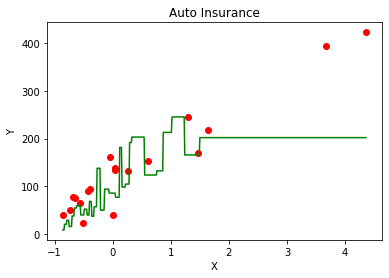

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

grdbst_regr = GradientBoostingRegressor(loss = 'huber')          # create  DecisionTreeReg with sklearn
grdbst_regr.fit(X_train,y_train)

plt.scatter(X_test,y_test, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,grdbst_regr.predict(X_grid),color="g")                 # line draw
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Auto Insurance")
plt.show()

# KNearestNeighbor

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsRegressor

n = 0
knn_rmse = np.zeros(9)
knn_r2 = np.zeros(9)

for i in range(1,10):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    knn_pred = neigh.predict(X_test)
    knn_rmse[n] = np.sqrt(mean_squared_error(y_test,knn_pred))
    knn_r2[n] = r2_score(y_test,knn_pred)
    print("\nThe predicted values for Test Set with neighbor k = ",i," is: \n",knn_pred[0:5])
    print("\nThe RMSE score for Test Set with neighbor k = ",i," is: ",knn_rmse[n])
    print("The R2 score for Test Set with neighbor k = ",i," is: ",knn_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", knn_rmse.min(), " with neighbor k = ", knn_rmse.argmin()+1)
print("The max R2 score of Test Set is ", knn_r2.max(), " with neighbor k = ", knn_r2.argmax()+1)         


The predicted values for Test Set with neighbor k =  1  is: 
 [[162.8]
 [ 56.9]
 [202.4]
 [119.4]
 [162.8]]

The RMSE score for Test Set with neighbor k =  1  is:  82.18986683604199
The R2 score for Test Set with neighbor k =  1  is:  0.4204217249251372

The predicted values for Test Set with neighbor k =  2  is: 
 [[205.45]
 [ 84.95]
 [182.6 ]
 [ 96.4 ]
 [182.6 ]]

The RMSE score for Test Set with neighbor k =  2  is:  83.10898995010297
The R2 score for Test Set with neighbor k =  2  is:  0.40738648340687844

The predicted values for Test Set with neighbor k =  3  is: 
 [[204.43333333]
 [ 79.7       ]
 [204.43333333]
 [124.7       ]
 [204.43333333]]

The RMSE score for Test Set with neighbor k =  3  is:  76.28605561111253
The R2 score for Test Set with neighbor k =  3  is:  0.5006950578589053

The predicted values for Test Set with neighbor k =  4  is: 
 [[206.825]
 [106.65 ]
 [206.825]
 [145.975]
 [206.825]]

The RMSE score for Test Set with neighbor k =  4  is:  75.17162052859268
T

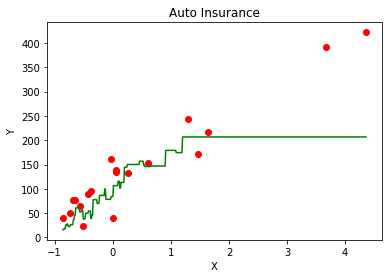

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

knn_regr = KNeighborsRegressor(n_neighbors=4)          # create  DecisionTreeReg with sklearn
knn_regr.fit(X_train,y_train)

plt.scatter(X_test,y_test, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,knn_regr.predict(X_grid),color="g")                 # line draw
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Auto Insurance")
plt.show()

# Stochastic Gradient Descent

In [25]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import SGDRegressor
reg = SGDRegressor()
reg.fit(X_train, y_train)
sgd_pred = reg.predict(X_test)
sgd_pred[0:5]

array([206.49037547,  99.34051543, 409.70562727, 147.37321131,
       221.26966651])

In [26]:
sgd_rmse = np.sqrt(mean_squared_error(y_test,sgd_pred))
sgd_r2 = r2_score(y_test,sgd_pred)
print("RMSE Score for Test set: ",sgd_rmse)
print("R2 Score for Test set: ",sgd_r2)

RMSE Score for Test set:  35.964710834037135
R2 Score for Test set:  0.88902409636619


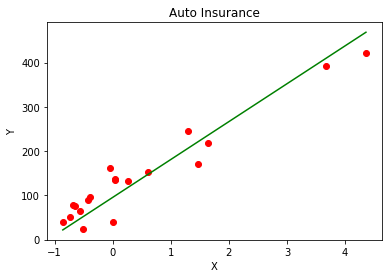

In [28]:
plt.scatter(X_test,y_test, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,reg.predict(X_grid),color="g")                 # line draw
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Auto Insurance")
plt.show()

# Support Vector Machines

### SVR

In [47]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.svm import SVR
k = ['linear', 'poly', 'rbf', 'sigmoid']
n = 0
svr_rmse = np.zeros(4)
svr_r2 = np.zeros(4)

for i in k:
    reg = SVR(kernel = i)
    reg.fit(X_train, y_train)
    svr_pred = reg.predict(X_test)
    svr_rmse[n] = np.sqrt(mean_squared_error(y_test,svr_pred))
    svr_r2[n] = r2_score(y_test,svr_pred)
    print("\nThe predicted values for Test Set with kernel = ",i," is: ",svr_pred[0:5])
    print("\nThe RMSE score for Test Set with kernel = ",i," is: ",svr_rmse[n])
    print("The R2 score for Test Set with kernel = ",i," is: ",svr_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", svr_rmse.min())
print("The max R2 score of Test Set is ", svr_r2.max())         


The predicted values for Test Set with kernel =  linear  is:  [ 85.35764159  64.22871306 125.42974743  73.70030171  88.27197656]

The RMSE score for Test Set with kernel =  linear  is:  111.70420508438686
The R2 score for Test Set with kernel =  linear  is:  -0.07056881649288682

The predicted values for Test Set with kernel =  poly  is:  [ 144.89693694   60.34373473 1971.83575518   69.02676061  183.29257285]

The RMSE score for Test Set with kernel =  poly  is:  747.9312827743432
The R2 score for Test Set with kernel =  poly  is:  -46.99532545592194

The predicted values for Test Set with kernel =  rbf  is:  [69.30866128 67.98705194 63.89962534 72.48159871 68.182745  ]

The RMSE score for Test Set with kernel =  rbf  is:  132.73030024779186
The R2 score for Test Set with kernel =  rbf  is:  -0.5115262647201191

The predicted values for Test Set with kernel =  sigmoid  is:  [83.49822574 67.91479086 84.37472023 80.6271826  83.70728339]

The RMSE score for Test Set with kernel =  sigmoi

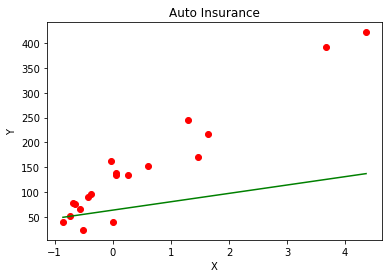

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

svr_regr = SVR(kernel='linear')          
svr_regr.fit(X_train,y_train)

plt.scatter(X_test,y_test, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,svr_regr.predict(X_grid),color="g")                 # line draw
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Auto Insurance")
plt.show()

### NuSVR

In [52]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.svm import NuSVR
k = ['linear', 'poly', 'rbf', 'sigmoid']
n = 0
nusvr_rmse = np.zeros(4)
nusvr_r2 = np.zeros(4)

for i in k:
    reg = NuSVR(kernel = i)
    reg.fit(X_train, y_train)
    nusvr_pred = reg.predict(X_test)
    nusvr_rmse[n] = np.sqrt(mean_squared_error(y_test,nusvr_pred))
    nusvr_r2[n] = r2_score(y_test,nusvr_pred)
    print("\nThe predicted values for Test Set with kernel = ",i," is: ",nusvr_pred[0:5])
    print("\nThe RMSE score for Test Set with kernel = ",i," is: ",nusvr_rmse[n])
    print("The R2 score for Test Set with kernel = ",i," is: ",nusvr_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", nusvr_rmse.min())
print("The max R2 score of Test Set is ", nusvr_r2.max())         


The predicted values for Test Set with kernel =  linear  is:  [ 89.70052842  70.30082166 126.49307572  78.99724193  92.37635004]

The RMSE score for Test Set with kernel =  linear  is:  109.67203967636499
The R2 score for Test Set with kernel =  linear  is:  -0.031970744218791314

The predicted values for Test Set with kernel =  poly  is:  [ 155.34605956   67.83826649 2046.12464477   76.82470831  195.08337611]

The RMSE score for Test Set with kernel =  poly  is:  779.8388065807193
The R2 score for Test Set with kernel =  poly  is:  -51.1777358913394

The predicted values for Test Set with kernel =  rbf  is:  [73.7665629  71.7394413  69.03469406 75.25050356 72.93507466]

The RMSE score for Test Set with kernel =  rbf  is:  129.9155723893075
The R2 score for Test Set with kernel =  rbf  is:  -0.4480980428950625

The predicted values for Test Set with kernel =  sigmoid  is:  [88.50991663 73.40334041 89.39878029 85.60213792 88.71959762]

The RMSE score for Test Set with kernel =  sigmoid

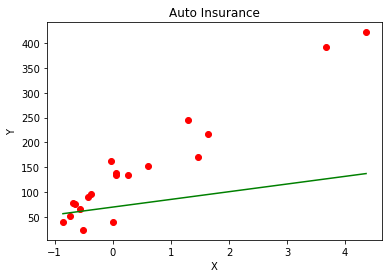

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

nusvr_regr = NuSVR(kernel='linear')          
nusvr_regr.fit(X_train,y_train)

plt.scatter(X_test,y_test, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,nusvr_regr.predict(X_grid),color="g")                 # line draw
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Auto Insurance")
plt.show()

### LinearSVR

In [54]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.svm import LinearSVR

reg = LinearSVR()
reg.fit(X_train, y_train)
linsvr_pred = reg.predict(X_test)
linsvr_rmse = np.sqrt(mean_squared_error(y_test,linsvr_pred))
linsvr_r2 = r2_score(y_test,linsvr_pred)
print("\nThe predicted values for Test Set is: ",linsvr_pred[0:5])
print("\nThe RMSE score for Test Set is: ",linsvr_rmse)
print("The R2 score for Test Set is: ",linsvr_r2)  


The predicted values for Test Set is:  [32.9040994  24.89174505 48.09994384 28.4834901  34.00925172]

The RMSE score for Test Set is:  152.6432952927343
The R2 score for Test Set is:  -0.9990838497148977


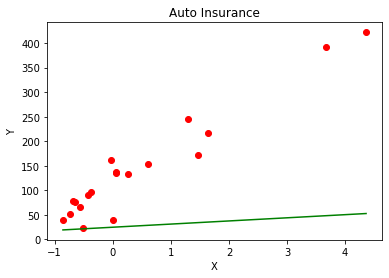

In [55]:
plt.scatter(X_test,y_test, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,reg.predict(X_grid),color="g")                 # line draw
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Auto Insurance")
plt.show()

# Report on accuracy of different algorithms using RMSE value and R2 score

In [56]:
# rmse = root mean squared score.......r2 = R2-Score
# 1.Linear Models
# 1.1. Linear Regression
linrgr_rmse
linrgr_r2

# 1.2. Ridge Regression
rdgrgr_rmse
rdgrgr_r2

# 1.3. Lasso
lasrgr_rmse
lasrgr_r2

# 1.4. ElasticNet
enrgr_rmse
enrgr_r2

# 1.5. LarsLasso
lslrrgr_rmse
lslrrgr_r2

# 2.Polynomial Regression
plrgr_rmse = plrgr_rmse.min()
plrgr_r2 = plrgr_r2.max()

# 3.Decision Tree
dt_rmse = dt_rmse.min()
dt_r2 = dt_r2.max()

# 4.Ensemble Methods
# 4.1. Random Forest
rf_rmse = rf_rmse.min()
rf_r2 = rf_r2.max()

# 4.2. AdaBoost
adb_rmse = adb_rmse.min()
adb_r2 = adb_r2.max()

# 4.3. GradientBoost
gdb_rmse = gdb_rmse.min()
gdb_r2 = gdb_r2.max()

# 5.KNearestNeighbor
knn_rmse = knn_rmse.min()
knn_r2 = knn_r2.max()

# 6.Stochastic Gradient Descent
sgd_rmse
sgd_r2

# 7.Support Vector Machines
# 7.1. SVR
svr_rmse = svr_rmse.min()
svr_r2 = svr_r2.max()

# 7.2. NuSVR
nusvr_rmse = nusvr_rmse.min()
nusvr_r2 = nusvr_r2.max()
# 7.3. LinearSVR
linsvr_rmse = linsvr_rmse
linsvr_r2 = linsvr_r2

#max of all
min_rmse = [linrgr_rmse,rdgrgr_rmse,lasrgr_rmse,enrgr_rmse,lslrrgr_rmse,plrgr_rmse,dt_rmse,rf_rmse,adb_rmse,gdb_rmse,knn_rmse,sgd_rmse,svr_rmse,nusvr_rmse,linsvr_rmse]
max_r2 = [linrgr_r2,rdgrgr_r2,lasrgr_r2,enrgr_r2,lslrrgr_r2,plrgr_r2,dt_r2,rf_r2,adb_r2,gdb_r2,knn_r2,sgd_r2,svr_r2,nusvr_r2,linsvr_r2]

## Final Report

In [57]:
data = {'Algorithm':['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'LarsLasso Regression', 'Polynomial Regression','Decision Tree Regression','Random Forest Regression','AdaBoost Regression','Gradient Boosting Regression','KNearest Neighbor Regression','Stochastic Gradient Regression','Support Vector Regression','Nu Support Vector Regression','Linear Support Vector Regression'], 
        'R2-Sore':max_r2, 'Root Mean Squared Error':min_rmse}
s = pd.DataFrame(data, index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
s

,Algorithm,R2-Sore,Root Mean Squared Error
1,Linear Regression,0.888053,36.121763
2,Ridge Regression,0.888083,36.116862
3,Lasso Regression,0.897880,34.499884
4,ElasticNet Regression,0.898244,34.438368
5,LarsLasso Regression,0.888053,36.121763
6,Polynomial Regression,0.888053,36.121763
7,Decision Tree Regression,0.488401,77.219520
8,Random Forest Regression,0.478242,76.773148
9,AdaBoost Regression,0.458503,79.443846
10,Gradient Boosting Regression,0.488094,77.242691
